<a href="https://colab.research.google.com/github/divi1287/ARIMA-Model/blob/main/DEMO_1_ADVERTISING_LINEAR_REG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

## Load the Advertising Dataset

In [ ]:
df = pd.read_csv('Advertising.csv')

In [ ]:
# head
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
# Drop unwanted features
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Describe the Data

In [ ]:
df.describe().round(2)

,TV,radio,newspaper,sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,14.02
std,85.85,14.85,21.78,5.22
min,0.70,0.00,0.30,1.60
25%,74.38,9.98,12.75,10.38
50%,149.75,22.90,25.75,12.90
75%,218.82,36.52,45.10,17.40
max,296.40,49.60,114.00,27.00


## Check for outliers

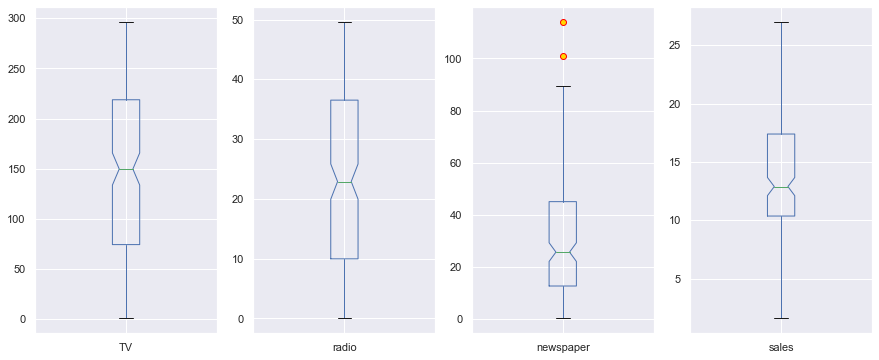

In [ ]:
df.plot(kind='box', subplots = True, figsize = (15,6));

In [ ]:
# Treat outliers
q1,q3 = df['newspaper'].quantile([0.25,0.75]).round(2)
IQR = q3 - q1

UL = q3 + (1.5*IQR)

df['newspaper'] = np.where(df['newspaper'] > UL, UL, df['newspaper'])

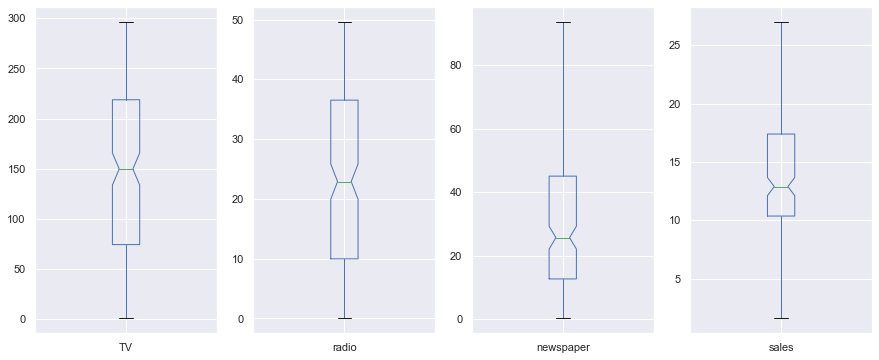

In [ ]:
# verifiy outlier treatment using boxplot
df.plot(kind='box', subplots = True, figsize = (15,6));

## Split the Data

In [ ]:
# split the data into X and y
X = df.drop('sales', axis=1)
y = df['sales']

In [ ]:
# split the data into train & test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


## Train a Linear Regression Model

In [ ]:
# fit a Linear Regression model and get its prediction
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

## Coefficients of the model

In [ ]:
# get the coefficients
lr.coef_

array([0.04684555, 0.17855873, 0.0025706 ])

In [ ]:
# get the intercept coefficient
lr.intercept_

2.907847353537049

## Interpreting Model Coefficients

sales = 2.93 + 0.05*tv +0.18*radio + 0.002*newspaper

## Evaluate the model performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

In [ ]:
# calculate rmse for train and test data predictions
rmse_train = mean_squared_error(y_train,train_pred, squared=False)
rmse_test = mean_squared_error(y_test, test_pred, squared=False)
rmse_train,rmse_test

(1.7369211682381989, 1.4109273462066865)

In [ ]:
# calculate the residuals for the predictions = error in prediction
residuals = y_test - test_pred
residuals

(0.8959350370888584, 0.8928235592312672)

## Residuals of the Model

In [ ]:
# calculate the residuals for the predictions = error in prediction
residuals = y_test - test_pred
residuals

58     2.063686
40     0.142838
34     1.840029
102   -3.092425
184   -1.077667
198    1.637114
95     0.563834
4     -0.556080
29     1.323037
168   -0.260431
171    0.032336
18     1.442945
11     0.138721
89    -0.018725
110   -1.694993
118    0.311258
159    0.448170
35    -4.479790
136   -1.594790
59     0.330406
51     1.365441
16    -0.359898
44    -0.283937
94     1.033099
31     0.497143
162   -0.131269
38     0.315363
28    -0.560828
193    1.369594
27    -1.296261
47     1.596162
165   -2.818216
194    1.007260
177   -0.664203
176    0.211061
97     0.124124
174   -2.467072
73     0.932094
69     1.327389
172    0.141249
Name: sales, dtype: float64

## Linear Regression Using Statsmodels Library

In [ ]:
# import library
from statsmodels.formula.api import ols

In [ ]:
# formula string
formula = 'sales ~ TV + radio + newspaper'

In [ ]:
# statsmodels requires that all indep variables and target variable be in a single dataframe
# so joining back together the indep & tgt vars of train & test datasets
df_train = pd.concat([X_train,y_train], axis=1)
df_test = pd.concat([X_test,y_test], axis=1)


In [ ]:
df_train

,TV,radio,newspaper,sales
108,13.1,0.4,25.6,5.3
107,90.4,0.3,23.2,8.7
189,18.7,12.1,23.4,6.7
14,204.1,32.9,46.0,19.0
56,7.3,28.1,41.4,5.5
...,...,...,...,...
133,219.8,33.5,45.1,19.6
137,273.7,28.9,59.7,20.8
72,26.8,33.0,19.3,8.8
140,73.4,17.0,12.9,10.9


In [ ]:
# train the model

model = ols(formula, df_train).fit()

In [ ]:
# model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     447.7
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           2.12e-76
Time:                        21:18:32   Log-Likelihood:                -315.37
No. Observations:                 160   AIC:                             638.7
Df Residuals:                     156   BIC:                             651.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9078      0.349      8.325      0.000       2.218       3.598
TV             0.0468      0.002     29.318      0.000       0.044       0.050
radio          0.1786      0.010     17.742      0.000       0.159       0.198
newspaper      0.0026      0.007      0.351      0.726      -0.012       0.017
==============================================================================
Omnibus:                       44.441   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.901
Skew:                          -1.257   Prob(JB):                     3.01e-20
Kurtosis:                       5.676   Cond. No.                         428.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# passing the test dataset without the tgt variable to get predictions
